## Списки

Вам дан список. Поменяйте порядок следования элементов, начиная с середины до конца списка.

In [62]:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
middle_index = len(my_list) // 2
my_list[middle_index:] = my_list[middle_index:][::-1]
my_list


[1, 2, 3, 4, 9, 8, 7, 6, 5]

Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётым со второго по пятый с конца. 

In [86]:
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

slice1 = lst[2:5:2]
slice2 = lst[-4:-1:2]

lst[2:5:2] = slice2
lst[-4:-1:2] = slice1
lst

[1, 2, 17, 4, 19, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 3, 18, 5, 20]

СРЕЗЫ!

## Генераторы

Вам дан список. Создайте новый список, который возведёт в квадрат элементы исходного списка.

In [ ]:
third_list = [1,2,3,4,5,6,7,8,9,10]

ans = [i ** 3 for i in third_list]

ans

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]

Вам дан список. Создайте новый список, который вычитает из каждого элемента списка пять. 

In [ ]:
x = [1,2,3,4,5,6,7,8]

ans = [i - 5 for i in x]

ans

[-4, -3, -2, -1, 0, 1, 2, 3]

## Встроенные функции

Вам дана строка. Выведите разницу между наибольшим и наименьшим ascii-кодом символа в строке. 

In [50]:
s = "Hello World"  

print(ord(max(s)) - ord(min(s))) 


82


Вам дана строка. Выведите отсортированную строку, приведённую к верхнему регистру. 

In [ ]:
str = "Hello World"

str = str.upper()
str = sorted(str)
str

[' ', 'D', 'E', 'H', 'L', 'L', 'L', 'O', 'O', 'R', 'W']

## NumPy

Вам дан одномерный массив. На основе этого массива сгенерируйте двумерный массив, который группирует по 4 элемента в строку из исходного.

Размерность исходного массива кратна 4.

Например:

`A = [1,2,3,4,5]` - исходный массив

`B = [[1,2,3,4],[2,3,4,5]]` - полученный

In [ ]:
import numpy as np

A = [1,2,3,4,5,6,7,8,9,10,11,12]
A = np.array(A)
B = np.reshape(A, (-1, 4))
B

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Дан массив числе одномерный


Создайте двумерный массив, где строка это бинарное представление числа из исходного.

Например:
`A = [0, 1, 2]` - исходный массив

`B = [[0 0 0 0 0 0 0 0]
     [0 0 0 0 0 0 0 1]
     [0 0 0 0 0 0 1 0]]` - полученный

In [ ]:
import numpy as np

A = np.array([0, 1, 2])
B = np.array([list('{0:08b}'.format(i)) for i in A])
B

array([['0', '0', '0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0', '0', '1'],
       ['0', '0', '0', '0', '0', '0', '1', '0']], dtype='<U1')

## Pandas

In [63]:
import pandas as pd

df = pd.read_csv("laptop_price.csv", encoding='cp1251')


print(df.dtypes, '\n')

for i in df.columns:
    print("Count null in",i,df[i].isnull().sum())


laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object 

Count null in laptop_ID 0
Count null in Company 0
Count null in Product 0
Count null in TypeName 0
Count null in Inches 0
Count null in ScreenResolution 0
Count null in Cpu 0
Count null in Ram 0
Count null in Memory 0
Count null in Gpu 0
Count null in OpSys 0
Count null in Weight 0
Count null in Price_euros 0


In [64]:
df["Ram"] = df["Ram"].str.replace('GB','').astype(float)


df[['width', 'height']] = df['ScreenResolution'].str.split('x', expand=True)
df['width'] = df['width'].str.extract('(\d+)').astype(float)
df['height'] = df['height'].str.extract('(\d+)').astype(float)

df.drop('ScreenResolution', axis=1, inplace=True)
df
print(df.dtypes, '\n')

laptop_ID        int64
Company         object
Product         object
TypeName        object
Inches         float64
Cpu             object
Ram            float64
Memory          object
Gpu             object
OpSys           object
Weight          object
Price_euros    float64
width          float64
height         float64
dtype: object 



In [65]:
temp = list(df['Cpu'].str.split(' '))
new_temp = []
new_temp1 = []
new_temp2 = []
for i in temp:
    new_temp.append(i[-1])
    new_temp1.append(i[-2])
    new_temp2.append(i[:-2])
    
df['frequency'] = new_temp
df['Model'] = new_temp1
df['Brand'] = new_temp2
df.drop('Cpu', axis=1, inplace=True)
df

,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,width,height,frequency,Model,Brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560.0,1600.0,2.3GHz,i5,"[Intel, Core]"
1,2,Apple,Macbook Air,Ultrabook,13.3,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440.0,900.0,1.8GHz,i5,"[Intel, Core]"
2,3,HP,250 G6,Notebook,15.6,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920.0,1080.0,2.5GHz,7200U,"[Intel, Core, i5]"
3,4,Apple,MacBook Pro,Ultrabook,15.4,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880.0,1800.0,2.7GHz,i7,"[Intel, Core]"
4,5,Apple,MacBook Pro,Ultrabook,13.3,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560.0,1600.0,3.1GHz,i5,"[Intel, Core]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1920.0,1080.0,2.5GHz,6500U,"[Intel, Core, i7]"
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,3200.0,1800.0,2.5GHz,6500U,"[Intel, Core, i7]"
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366.0,768.0,1.6GHz,N3050,"[Intel, Celeron, Dual, Core]"
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366.0,768.0,2.5GHz,6500U,"[Intel, Core, i7]"


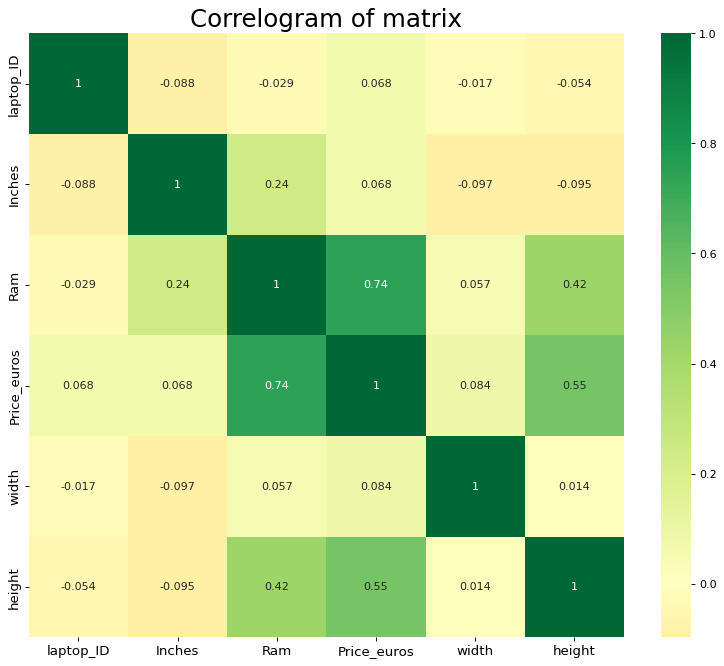

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of matrix', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

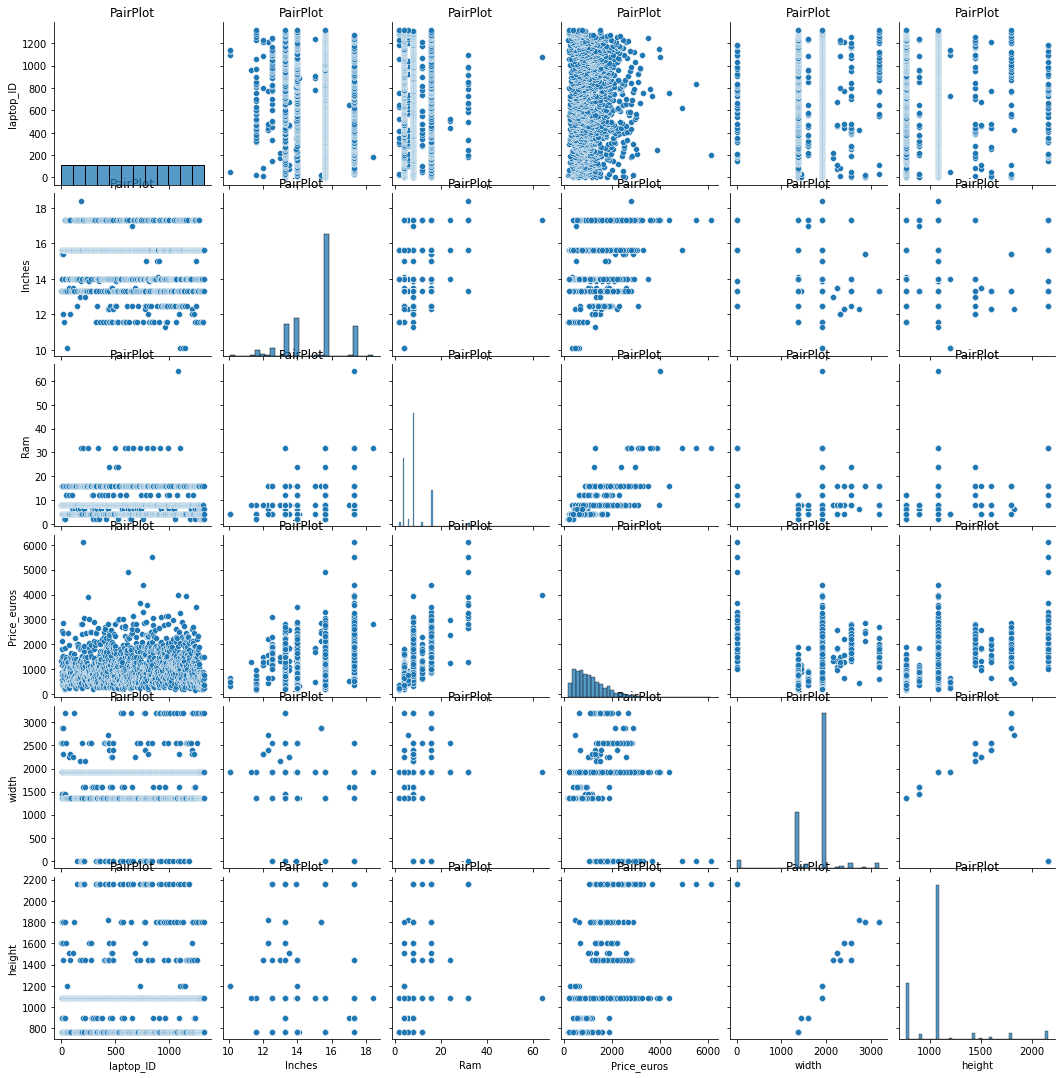

In [69]:

sns.pairplot(df).set(title="PairPlot")
plt.show()

Outliers in column Inches:
20      11.6
50      10.1
177     18.4
314     11.6
319     11.6
348     11.6
376     11.6
409     11.6
429     11.6
430     11.6
455     11.6
461     11.6
500     11.6
504     11.6
515     11.6
560     11.6
584     11.6
592     11.6
619     11.6
677     11.6
695     11.6
750     11.6
804     11.6
817     11.6
828     11.6
846     11.6
888     11.6
944     11.3
957     11.6
959     11.6
1049    11.6
1082    10.1
1114    10.1
1126    10.1
1215    11.6
1234    11.6
1268    11.6
1282    11.6
1296    11.6
Name: Inches, dtype: float64
Outliers in column Ram:
3       16.0
6       16.0
8       16.0
12      16.0
17      16.0
        ... 
1247    16.0
1256    16.0
1271    16.0
1285    16.0
1299    16.0
Name: Ram, Length: 221, dtype: float64
Outliers in column Price_euros:
17      2858.00
190     2824.00
196     6099.00
204     3055.00
238     3890.00
247     2999.00
297     2884.86
517     2968.00
530     3012.77
563     2999.00
610     4899.00
659     3147.37
723    

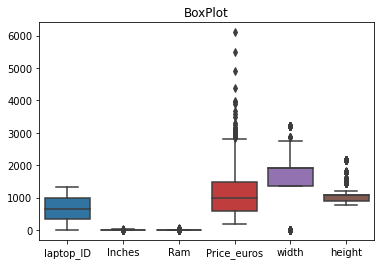

In [70]:
sns.boxplot(data=df).set(title="BoxPlot")

def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column[(column < Q1 - 1.5*IQR) | (column > Q3 + 1.5*IQR)]

for column in df.select_dtypes(include=['number']):
    outliers = find_outliers(df[column])
    if not outliers.empty:
        print(f"Outliers in column {column}:")
        print(outliers)


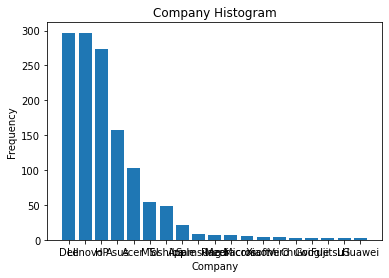

In [71]:
company_counts = df['Company'].value_counts()

plt.bar(company_counts.index, company_counts.values)
plt.title('Company Histogram')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.show()



https://www.kaggle.com/datasets/muhammetvarl/laptop-price

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Очистите переменные: например `Ram` от Gb (сделав ее числовой), `ScreenResolution` создайте две колонки, например, ширина отдельно и длинна отдельно (тем самым сделав ее числовой), разделите колонку `Cpu` отдельно на тип процессора и отдельно на часототу, и так далее.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных.
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Постройте гистраграмму переменной `Company`.